In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numba
import numpy as np
from math import sqrt

## Numba

In [2]:
@numba.jit
def Moffat(r,alpha,beta):
    return (1+(r/alpha)**2)**(-beta)

In [3]:
@numba.jit
def generateMoffatIm(center=(12,12), shape=(25,25), alpha=2, beta=2.5):
    res=np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            r=sqrt(((i-center[0]))**2 + ((j-center[1]))**2)
            res[i,j]=Moffat(r,alpha,beta)
    res=res/np.sum(res)
    return res

In [4]:
%time im1 = generateMoffatIm()

CPU times: user 476 ms, sys: 16 ms, total: 492 ms
Wall time: 528 ms


In [12]:
%timeit im1 = generateMoffatIm()

118 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
# im1 = generateMoffatIm()
# plt.imshow(im1, interpolation='nearest', origin='lower')

## Numpy

In [7]:
def generate_moffat(center=(12,12), shape=(25,25), alpha=2, beta=2.5):
    """Generate an image with a Moffat profile."""
    x, y = np.indices(shape)
    res = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    res = (1 + (res/alpha)**2)**(-beta)
    res /= res.sum()
    return res

In [8]:
%time im2 = generate_moffat()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 362 µs


In [9]:
%timeit im2 = generate_moffat()

130 µs ± 53.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
# im2 = generate_moffat()
# plt.imshow(im2, interpolation='nearest', origin='lower')

In [11]:
np.allclose(im1, im2)

True

## PSF cube

In [1]:
%mpdaf
from mpdaf.MUSE.PSF import create_psf_cube
from muse_analysis.plotutils import show_images_grid

Numpy 1.14.0
Astropy 3.1.dev21349
MPDAF 2.5.dev2550


/home/conseil/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
s = Source.from_file('/muse/UDF/private/analysis/musex/work/export/hst_udf10/muse-udf-10/source-06115.fits')
cube = s.cubes['MUSE_CUBE']
a, b, beta, field = s.get_FSF()
psf = b*cube.wave.coord()+a

Ref @master

In [3]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs)

4.77 s ± 8.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

4.82 s ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
gauss = create_psf_cube(cube.shape, psf, wcs=cube.wcs)

In [6]:
moff = create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

In [9]:
fits.writeto('gauss.ref.fits', gauss)
fits.writeto('moff.ref.fits', moff)

V1

In [3]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs)

3.08 s ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

3.21 s ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


V2

In [7]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs)

2.59 s ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

2.3 s ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


V3

In [3]:
%mpdaf
from mpdaf.MUSE.PSF import create_psf_cube
from muse_analysis.plotutils import show_images_grid

Numpy 1.14.0
Astropy 3.1.dev21349
MPDAF 2.5.dev2550


In [4]:
s = Source.from_file('/muse/UDF/private/analysis/musex/work/export/hst_udf10/muse-udf-10/source-06115.fits')
cube = s.cubes['MUSE_CUBE']
a, b, beta, field = s.get_FSF()
psf = b*cube.wave.coord()+a

In [5]:
gauss = create_psf_cube(cube.shape, psf, wcs=cube.wcs)

In [6]:
# gauss /= gauss.sum(axis=(1,2))[:, None, None]

In [7]:
ref = fits.getdata('gauss.ref.fits')

/home/conseil/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


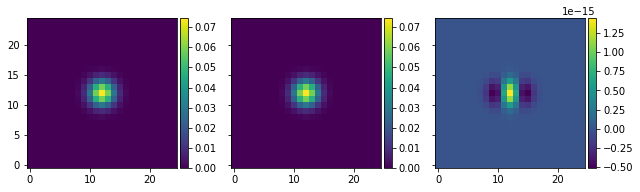

In [8]:
show_images_grid([gauss[0], ref[0], gauss[0] - ref[0]]);

/home/conseil/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


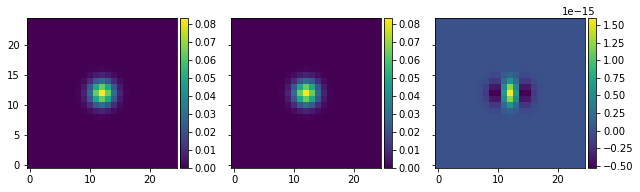

In [9]:
show_images_grid([gauss[1000], ref[1000], gauss[1000] - ref[1000]]);

In [10]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs)

285 ms ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
moff = create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

In [12]:
ref = fits.getdata('moff.ref.fits')

/home/conseil/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


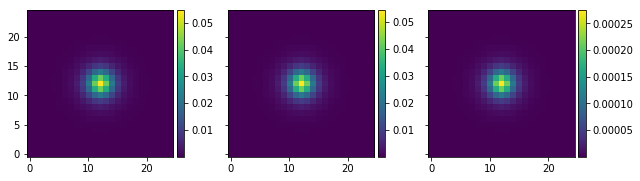

In [13]:
show_images_grid([moff[0], ref[0], moff[0] - ref[0]]);

/home/conseil/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


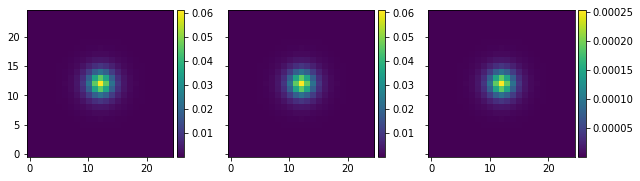

In [14]:
show_images_grid([moff[1000], ref[1000], moff[1000] - ref[1000]]);

In [15]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

318 ms ± 572 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit create_psf_cube(cube.shape, psf, wcs=cube.wcs, beta=beta)

540 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
